Cell 1: Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
import matplotlib.pyplot as plt

Cell 2: Loading and Preprocessing Data

In [ ]:
# MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Data Loading
x_train, x_test = x_train/255.0, x_test/255.0  # Normalizing the data


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Cell 3: Plotting an Example

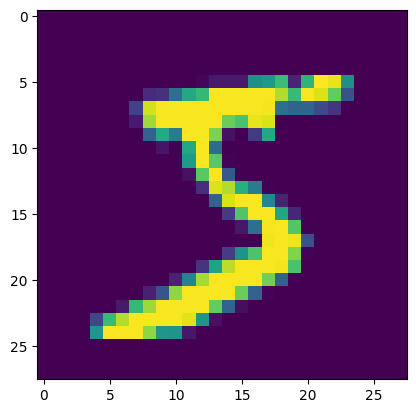

In [ ]:
# Plotting an example
plt.imshow(x_train[0])
plt.show()


Cell 4: Preparing the Model

In [ ]:

# Preparing the model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(120, activation="relu"),
    Dropout(0.2),
    Dense(10)
])

Cell 5: Making Predictions

In [ ]:
# Making predictions
predictions = model(x_train[:1]).numpy()
print(predictions)


[[-0.09185798 -0.32474178  0.21494393  0.02276381  0.08366556 -0.29231253
  -0.68927133  0.18777731 -0.46488395  0.10915904]]


Cell 6: Applying Softmax

In [ ]:
# Applying softmax
print(tf.nn.softmax(predictions).numpy())


[[0.09933279 0.07869597 0.1350004  0.11139669 0.11839177 0.08128986
  0.05465619 0.13138226 0.06840527 0.1214488 ]]


Cell 7: Defining Loss Function

In [ ]:
# Loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


Cell 8: Compiling the Model

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


Cell 9: Training the Model

In [ ]:
# Training the model
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8638 - loss: 0.4701
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9558 - loss: 0.1507
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9669 - loss: 0.1087
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9714 - loss: 0.0912
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9771 - loss: 0.0746


Cell 10: Evaluating the Model

In [ ]:
# Evaluating the model
model.evaluate(x_test, y_test, verbose=2)


313/313 - 1s - 4ms/step - accuracy: 0.9763 - loss: 0.0733


[0.07330735772848129, 0.9763000011444092]

Cell 11: Validation of Model and Plotting Accuracy

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9829 - loss: 0.0551 - val_accuracy: 0.9786 - val_loss: 0.0641
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9853 - loss: 0.0463 - val_accuracy: 0.9789 - val_loss: 0.0632
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9855 - loss: 0.0475 - val_accuracy: 0.9785 - val_loss: 0.0623
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9871 - loss: 0.0421 - val_accuracy: 0.9799 - val_loss: 0.0622
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9865 - loss: 0.0435 - val_accuracy: 0.9794 - val_loss: 0.0628


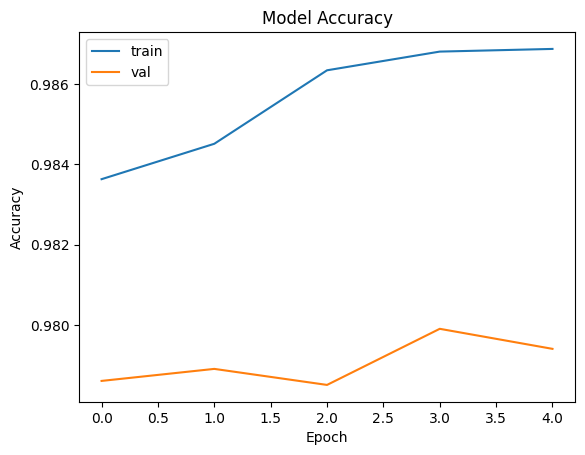

In [ ]:
# Validation of Model
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=300)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train", "val"])
plt.show()
